<a href="https://colab.research.google.com/github/EunHee-Jeong/Open-Source-Project/blob/feature%2F%232/oss_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# 1-1. 데이터 불러오기
bus_data = pd.read_csv("./drive/MyDrive/data/BUS_STATION_BOARDING_MONTH_202110.csv", encoding = 'cp949')
bus_data.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20211001,130,130번(우이동~길동),09003,수유역,221,163,20211004
1,20211001,100,100번(하계동~용산구청),11428,한성여객종점,22,1,20211004
2,20211001,100,100번(하계동~용산구청),11387,노원평생학습관,12,1,20211004
3,20211001,100,100번(하계동~용산구청),11374,서울시립북서울미술관,52,1,20211004
4,20211001,100,100번(하계동~용산구청),03325,서빙고역1번출구,49,51,20211004


In [ ]:
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191679 entries, 0 to 1191678
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1191679 non-null  int64 
 1   노선번호        1191679 non-null  object
 2   노선명         1191679 non-null  object
 3   버스정류장ARS번호  1191679 non-null  object
 4   역명          1191679 non-null  object
 5   승차총승객수      1191679 non-null  int64 
 6   하차총승객수      1191679 non-null  int64 
 7   등록일자        1191679 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 72.7+ MB


In [ ]:
# 1-2. 확인하기 (필요한 데이터만, 오름차순 정렬)
sorted(list(set(bus_data['노선번호'])))

['0017',
 '01A',
 '01B',
 '02',
 '04',
 '100',
 '101',
 '1014',
 '1017',
 '102',
 '1020',
 '103',
 '104',
 '105',
 '106',
 '107',
 '109',
 '110A',
 '110B',
 '111',
 '1111',
 '1113',
 '1114',
 '1115',
 '1116',
 '1119',
 '1120',
 '1122',
 '1124',
 '1126',
 '1127',
 '1128',
 '1129',
 '1130',
 '1131',
 '1132',
 '1133',
 '1135',
 '1136',
 '1137',
 '1138',
 '1139',
 '1140',
 '1141',
 '1142',
 '1143',
 '1144',
 '1154',
 '1155',
 '1156',
 '1162',
 '1164',
 '1165',
 '1167',
 '120',
 '121',
 '1213',
 '1218',
 '1221',
 '1222',
 '1224',
 '1226',
 '1227',
 '130',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '150',
 '151',
 '152',
 '153',
 '160',
 '162',
 '171',
 '1711',
 '172',
 '173',
 '201',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '202',
 '2112',
 '2113',
 '2114',
 '2115',
 '2211',
 '2221',
 '2222',
 '2224',
 '2227',
 '2230',
 '2233',
 '2234',
 '2235',
 '2311',
 '2312',
 '240',
 '241',
 '2412',
 '2413',
 '2415',
 '242',
 '260',
 '261',
 '262',
 '270',
 '271',
 '2

In [ ]:
sorted(list(set(bus_data['노선명'])))

['0017번(청암동~이촌동)',
 '01A번(서울역환승센터~서울역환승센터)',
 '01B번(서울역환승센터~서울역환승센터)',
 '02번(예장주차장~예장주차장)',
 '04번(예장주차장~예장주차장)',
 '100번(하계동~용산구청)',
 '1014번(정릉~신당동)',
 '1017번(월계동~상왕십리)',
 '101번(화계사~동대문)',
 '1020번(정릉~교보문고)',
 '102번(상계동~동대문)',
 '103번(삼화상운~서울역)',
 '104번(강북청소년수련관난나~숭례문)',
 '105번(상계동~서울역)',
 '106번(의정부~동대문)',
 '107번(민락동차고지~동대문)',
 '109번(우이동~서울역)',
 '110번(A,고려대방향,정릉~정릉)',
 '110번(B,국민대방향,정릉~정릉)',
 '1111번(번동~성북동)',
 '1113번(정릉~월곡역)',
 '1114번(정릉~길음역)',
 '1115번(수유중학교,혜화여고~미아삼거리역)',
 '1116번(국민대학교~미아삼거리역)',
 '1119번(강북청소년수련관난나~녹천역)',
 '111번(민락동차고지~동대문)',
 '1120번(하계동~삼양동입구)',
 '1122번(상진운수차고지~원자력병원)',
 '1124번(수유역~미아삼거리역)',
 '1126번(강북청소년수련관난나~안방학동)',
 '1127번(도봉동~도봉동)',
 '1128번(도봉동~도봉동)',
 '1128번(도봉산~월곡동)',
 '1129번(상계현대2차아파트~창동역동측)',
 '1130번(청백아파트1단지~석계역1번출구.B)',
 '1131번(중계본동~석계역)',
 '1132번(월계동~노원역)',
 '1133번(염광고교(수유)~염광고교(석계))',
 '1135번(석계역~중계역)',
 '1136번(월계동E마트~원자력병원)',
 '1137번(상계동~미아사거리)',
 '1138번(상계동~수유역)',
 '1139번(상계동~방학3동주민센터)',
 '1140번(중계동~광운대)',
 '1141번(중계본동~석계역)',
 '1142번(중계본동~창동역)',
 '1143번(수락리

In [ ]:
sorted(list(set(bus_data['역명'])))

['(구)경남호텔앞',
 '(구)법화사',
 '1156번종점',
 '11단지',
 '123전자타운.2001아울렛',
 '12번지건영아파트',
 '13단지아파트입구',
 '14단지상가',
 '1호선구일역',
 '2001아울렛중계점',
 '201동.동신교회',
 '202번종점',
 '203동앞',
 '24시편의점',
 '2단지종합상가',
 '2호선교대역7번출구',
 '3단지.소월아파트.다산아파트',
 '3단지.율곡아파트',
 '3단지종합상가',
 '3호선독립문역',
 '4호선성신여대역',
 '508단지입구',
 '508단지장터앞',
 '5단지입구',
 '63빌딩',
 '63빌딩.가톨릭대학교여의도성모병원',
 '6번지입구',
 '72보병사단',
 '7단지영업소',
 '7단지영업소(가상)',
 '7호선가산디지털단지역',
 '7호선수락산역',
 '7호선신대방삼거리역2번출구.국민은행',
 '7호선신대방삼거리역4번출구',
 '7호선장승배기역.상도2치안센터',
 '7호선장승배기역2번출구',
 '7호선장승배기역5번출구',
 '806의무경찰대.우남아파트',
 '8번지슈퍼',
 '8번지입구',
 '9호선노량진역.동작구청',
 'AT센터.양재꽃시장',
 'BK국제관',
 'BRT.반도유보라아이비파크후문',
 'CBS방송국',
 'CGV신촌아트레온',
 'CM충무병원',
 'DMC두산위브아파트',
 'DMC래미안e-편한세상3단지',
 'DMC래미안e.편한세상2.4단지',
 'DMC래미안e.편한세상요진아파트',
 'DMC리슈빌.DMC호반2.3단지',
 'DMC빌',
 'DMC센트럴아이파크아파트',
 'DMC쌍용.래미안루센티아',
 'DMC에코자이아파트',
 'DMC첨단산업센터',
 'DMC파크뷰자이',
 'DMC파크뷰자이별동상가',
 'DMC한양아파트',
 'DMC해링턴플레이스',
 'EN갤러리',
 'GS25',
 'GS25.한신아파트',
 'GS25앞',
 'GS강동자이아파트.둔촌동프라자아파트',
 'GS주유소',
 'GS편의점',
 'GS편의점.소망유통',
 'GS편의점.제일영광

In [ ]:
sorted(list(set(bus_data['승차총승객수'])))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
sorted(list(set(bus_data['하차총승객수'])))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
# 불필요한 칼럼 제거
my_bus_data = bus_data.drop(columns={'버스정류장ARS번호', '등록일자'})
my_bus_data

,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수
0,20211001,130,130번(우이동~길동),수유역,221,163
1,20211001,100,100번(하계동~용산구청),한성여객종점,22,1
2,20211001,100,100번(하계동~용산구청),노원평생학습관,12,1
3,20211001,100,100번(하계동~용산구청),서울시립북서울미술관,52,1
4,20211001,100,100번(하계동~용산구청),서빙고역1번출구,49,51
...,...,...,...,...,...,...
1191674,20211031,마포11,마포11(신촌전철역~마포역),굴다리시장,33,21
1191675,20211031,5714,5714번(광명공영차고지~이대입구),영등포시장,233,346
1191676,20211031,마포12,마포12(신촌전철역~마포역),신석초등학교,70,66
1191677,20211031,173,173번(월계동~연세대),서울대동창회관,76,67


In [ ]:
# 노선별 평균 승하차 인원 확인
bus_st = my_bus_data.groupby(['노선번호','역명']).mean().reset_index()
bus_st

,노선번호,역명,사용일자,승차총승객수,하차총승객수
0,0017,남이장군사당,20211016.0,26.548387,57.677419
1,0017,산천동,20211016.0,96.806452,94.209677
2,0017,산천동리버힐삼성아파트,20211016.0,1.451613,131.032258
3,0017,삼성테마트,20211016.0,0.290323,64.903226
4,0017,새마을금고,20211016.0,168.129032,117.887097
...,...,...,...,...,...
26640,중랑02,지하철7호선면목역,20211016.0,1227.290323,677.838710
26641,중랑02,진로아파트앞.종점,20211016.0,51.403226,97.983871
26642,중랑02,진주빌라.바다약국,20211016.0,209.290323,149.870968
26643,중랑02,하나은행면목지점,20211016.0,94.096774,117.612903


In [ ]:
# 상위 5개 노선 출력
bus_st = bus_st.sort_values(by = '승차총승객수', ascending = False) # 승하차가 비례함을 확인했기 때문에, 승차총승객수를 기준으로 잡음
bus_st.head(5)

,노선번호,역명,사용일자,승차총승객수,하차총승객수
22627,금천03,구로디지털단지역환승센터,20211016.0,2889.161290,3048.774194
25724,양천01,당산역.지하철2호선,20211016.0,2632.000000,2014.419355
24985,서초18,양재역,20211016.0,2469.677419,460.483871
24313,서대문03,신촌전철역,20211016.0,2463.258065,975.483871
12323,5621,구로디지털단지역환승센터,20211016.0,2361.677419,2171.967742


In [ ]:
# 202번 버스의 승차 인원 컬럼만 추출
num = '202'
bus_st_202 = bus_st[bus_st['노선번호']==num]
bus_get_on = pd.DataFrame()
bus_get_on['노선번호'] = bus_st_202['노선번호']
for i in range(int((len(my_bus_data.columns)-3)/2)):
    bus_get_on[bus_st_202.columns[3+2*i]] = bus_st_202[bus_st_202.columns[3+2*i]]
bus_get_on = bus_get_on.set_index('노선번호')
bus_get_on

,승차총승객수
노선번호,
202,16.500000
202,41.919355
202,65.838710
202,107.919355
202,244.419355
...,...
202,79.951613
202,554.193548
202,99.451613


In [ ]:
# 202번 버스의 하차 인원 컬럼만 추출
bus_get_off = pd.DataFrame()
bus_get_off['노선번호'] = bus_st_202['노선번호']
for i in range(int((len(my_bus_data.columns)-3)/2)):
    bus_get_off[bus_st_202.columns[4+2*i]] = bus_st_202[bus_st_202.columns[4+2*i]]
bus_get_off = bus_get_off.set_index('노선번호')
bus_get_off

,하차총승객수
노선번호,
202,13.693548
202,34.112903
202,83.870968
202,85.403226
202,144.870968
...,...
202,79.370968
202,689.258065
202,150.451613


In [ ]:
# 202번 버스가 지나치는 곳 중 유동인구가 가장 많은 정거장 찾기

# 1. 데이터 프레임으로 저장
df = pd.DataFrame(index = bus_st_202['역명'])
df['평균 승차 인원 수'] = bus_get_on.mean(axis=0).astype(int)
df['평균 하차 인원 수'] = bus_get_off.mean(axis=0).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
역명,,
202번종점,NaN,NaN
KCC스위첸아파트,NaN,NaN
갈월동,NaN,NaN
경춘선숲길화랑대역공원,NaN,NaN
국민은행중화동지점,NaN,NaN
...,...,...
효성해링턴코트,NaN,NaN
후암동종점,NaN,NaN
후암삼거리,NaN,NaN


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52408 missing from current font.
  font.set_

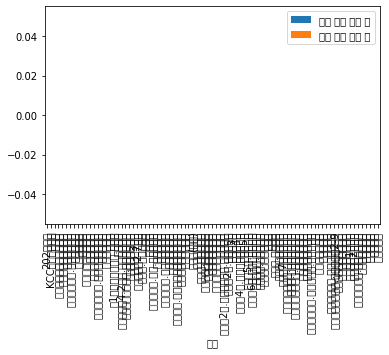

In [ ]:
df.plot.bar()